# Exploring Sensitivity Analysis with CHIMES 

How to know which parameter is the one that requires best attention in the calibration ? 
We show how here how CHIMES can answer such issues, using Monte-Carlo-like simulations 

The protocol is the following:
* You decide a model you want to study
* You find an "as good as possible calibration" of the model
* You determine which output variables you consider relevant 
* You determine the timescale it should be relevant
* You run CHIMES
* You write your article!

In [2]:
# Importing the library
import sys
sys.path.insert(0, "C:\\Users\\Paul Valcke\\Documents\\GitHub\\CHIMES")
import chimes as chm
import matplotlib.pyplot as plt

import plotly
from IPython.display import display, HTML

plotly.offline.init_notebook_mode()
display(HTML(
    '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
))

## An example

We consider a Goodwin-Keen model (here `GK`) of an economy with a preset far from equilibrium `debtstabilisation`

In [ ]:
hub=chm.Hub('GK',preset='debtstabilisation')
hub.run()
hub.plot_preset()

In [ ]:
# We can look at the variables 
hub.get_summary()

## Replacing a parameter by a distribution of parameters

let assume we have a parameter $x$. Instead of running one simulation with one value of $x$, we select an ensemble of $N$ possible values for $x$ in a distribution $f(\mu,\sigma)$. 
Typically :
* $\mu$ is the mean value of the distribution
* $\sigma$ is the standard deviation of the value 
* $f()$ is a distribution. It can be a Gaussian, a log-normal, uniform... 

In order to know which type of distribution one should consider, here are a few rules of thumb:
* If your parameter is the consequence of the product of many phenomenon, it should be a log-normal. 
* If your parameter sign is well defined, chances are a log-normal should be better
* If your parameter is the consequence of a sum of many phenomenon, it should be normal

It's sometimes practical to think in term of value and margin of error 

In [ ]:

Tests = {'log':{    'mu': 1,
                    'sigma': .12,
                    'type':'log' },
            'lognormal':{'mu': .02,
                    'sigma': .3,
                    'type':  'lognormal'},
            'log-normal':{'mu': .02,
                    'sigma': .4,
                    'type':'log-normal'},
            'normal':{'mu': .02,
                    'sigma': .12,
                    'type': 'normal'},
            'gaussian':{'mu': .02,
                    'sigma': .12,
                    'type': 'gaussian'},
            'uniform':{'mu': .02,
                    'sigma': .12,
                    'type':'uniform'},
            'uniform-bounds':{'mu': .02,
                    'sigma': .12,
                    'type':'uniform-bounds'},
            }
TestDistrib = chm.generate_dic_distribution(Tests,
                                            N=1000)

import numpy as np

for k in Tests.keys():
    print(f'########{k}#########')
    print(f'Sent dic: {Tests[k]}' )
    print(f'mean :{np.mean(TestDistrib[k])}')
    print(f'std  :{np.std( TestDistrib[k])}')
    plt.figure(k)
    plt.hist(TestDistrib[k],bins=50)
    plt.show()

## Run with one parameter in a distribution

We change the value of $\alpha$ and we see all the runs !


Changing Dimensions: ['nx']
Changing Fields: ['alpha']
Now nx has 100 sectors with names [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

Changing Dimensions: ['Tmax']

time step 200 / 200


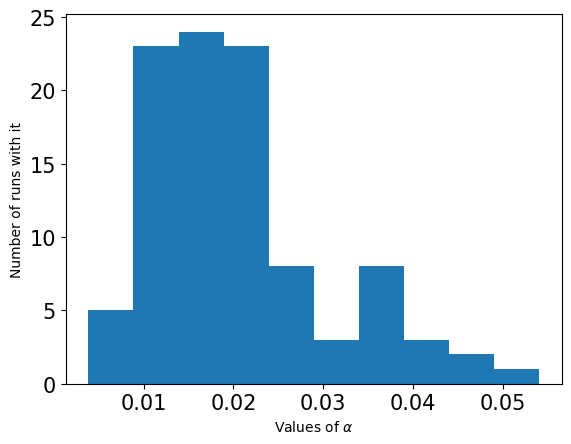

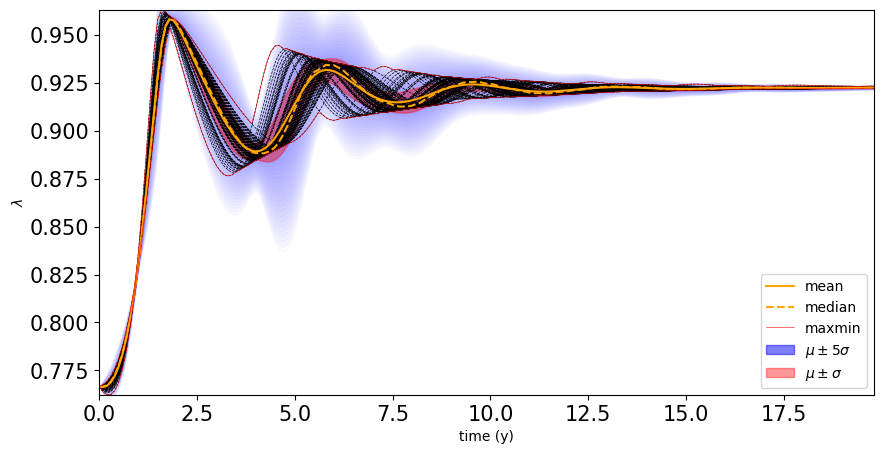

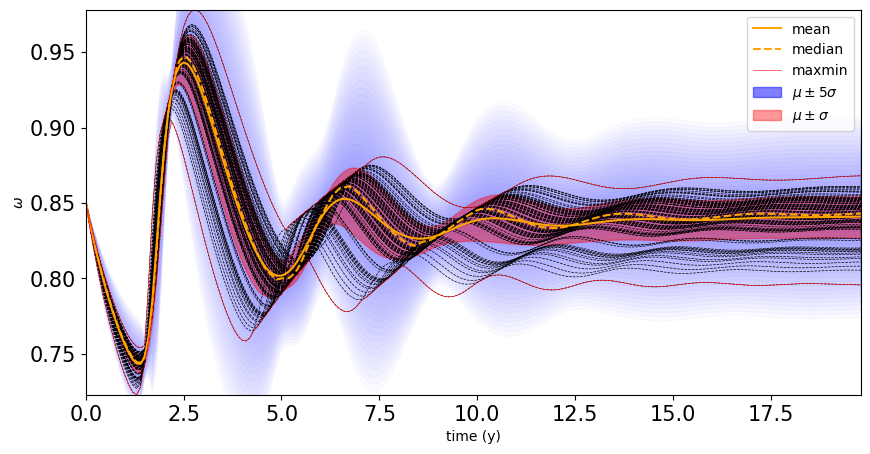

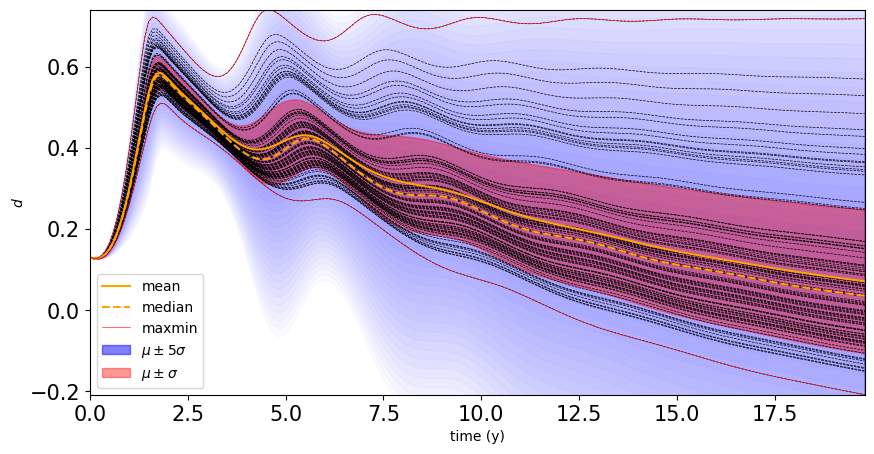

In [3]:
presetCoupled = chm.generate_dic_distribution({'alpha': {'mu': 0.02,
               'sigma': 0.5*0.02,
               'type': 'log'}, },
                                              N=100)


plt.figure('')
plt.hist(presetCoupled['alpha'])
plt.xlabel(r'Values of $\alpha$')
plt.ylabel('Number of runs with it')

hub=chm.Hub('GK',verb=False)
hub.set_dparam(**presetCoupled)
hub.set_dparam('Tmax',20)
hub.run()
hub.calculate_StatSensitivity()

for var in ['employment','omega','d']:
    chm.plots.Var(hub,var,mode='sensitivity')

In [10]:
hub=chm.Hub('GK')
hub.set_dparam('Delta',0.01)
hub.set_dparam('Tmax',5)
hub.set_dparam('dt',0.1)
OUT=hub.run_sensitivity(verb=False,std=0.05)
FIGURES=chm.plots.Showsentivitity(OUT,['employment','omega','d'],0.05)


The following fields are defined in the model but not it the library :
The following fields are identified as parameters :
	- independant : ['alpha', 'n', 'delta', 'r', 'nu', 'eta', 'mu', 'k0', 'k1', 'k2', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['Dh', 'time']
	 - state variable : ['d', 'g', 'GDP']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['Y', 'L', 'GDP', 'd', 'omega', 'employment', 'c', 'Pi', 'inflation', 'phillips', 'pi', 'kappa', 'I', 'Ir', 'g', 'C']
	- differential: ['a', 'N', 'K', 'w', 'p', 'D', 'Dh', 'time']

Changing Fields: ['Delta']
Identified Delta as a value change on all axes

Changing Dimensions: ['Tmax']

Changes Ignored:['dt']

Changing Dimensions: ['nx']
Changing Fields: ['a', 'N', 'K', 'w', 'p', 'D', 'Dh', 'Delta', 'alpha', 'n', 'delta', 'r', 'nu', 'eta', 'mu', 'k0', 'k1', 'k2', 'phinull']
Now nx has 10 sectors

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>